# <center>openCV GUI 特性</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.zeros((4, 4), dtype=np.float16)
print(x[:])

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [16]:
import cv2
import torch

cap = cv2.VideoCapture(1)


while True:
    ret, frame = cap.read()

    if not ret:
        print("Can't receive frame")
        break
    #cv2.resize(frame, 1080, 1980)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()



## 1.图片操作

###  1.1将图像BGR转化为RGB

torch.Size([1, 720, 723, 3])


C:\Users\funti\AppData\Local\Temp\ipykernel_3636\296439714.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  tensor = torch.tensor([img])


(([], []), ([], []))

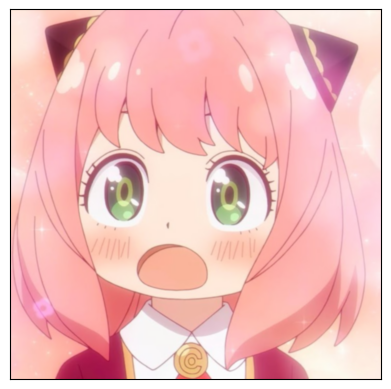

In [1]:
import cv2 as cv
import torch
import matplotlib.pyplot as plt

img = cv.imread('Aniya1.jpg', 1)

"""
将BGR转化成为RGB
"""
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# b, g, r = cv.split(img)
# rgb_img = cv.merge([r, g, b])
tensor = torch.tensor([img])

print(tensor.shape)
plt.imshow(rgb_img, cmap='gray', interpolation='bicubic')
plt.xticks([]), plt.yticks([])
#plt.show()


###  1.2图像翻转

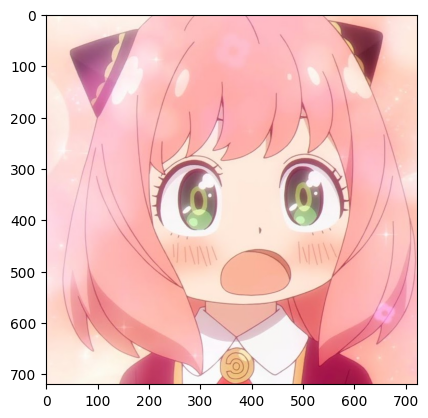

In [13]:
import cv2 as cv 
import torch
import matplotlib.pyplot as plt

bgr_img2 = cv.imread('Aniya1.jpg', 1)

x_flip = cv.flip(bgr_img2, 1)

rgb_img2 = cv.cvtColor(x_flip, cv.COLOR_BGR2RGB)

plt.imshow(rgb_img2)


### 1.3图像拼接

In [6]:
import cv2 as cv
import numpy as np
img1 = cv.imread('1.jpg', 0)
img2 = cv.imread('2.jpg', 0)

img1 = cv.resize(img1, (2000, 3000))
img2 = cv.resize(img2, (2000, 3000))

arr1 = np.array(img1)
print(arr1.shape)
arr2 = np.array(img2)
print(arr2.shape)

img = np.concatenate((arr1, arr2), axis=0)
# print(img.shape) 
cv.imwrite('test.png', img)
cv.imshow('img', img)
cv.waitKey(0)
cv.destroyAllWindows()

(3000, 2000)
(3000, 2000)


##  2.读取视频入门

In [3]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(1)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # 逐帧捕获
    ret, frame = cap.read()
    # 如果正确读取帧，ret为True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)# 图像颜色转换
    # 显示结果帧e
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
# 完成所有操作后，释放捕获器
cap.release()
cv.destroyAllWindows()

## 3.opencv绘图功能

###  3.1画线

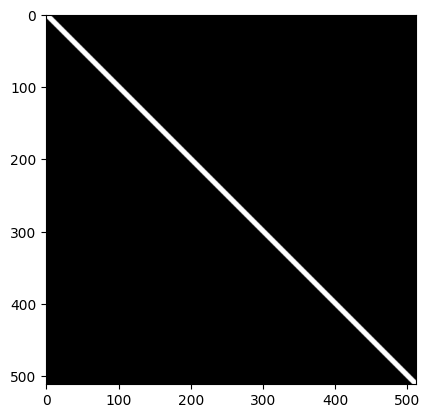

In [1]:
"""
draw line on photos
"""
import numpy as np
import cv2 as cv 
import matplotlib.pyplot as plt

fig31 = plt.figure()
axe31 = plt.axes()

img31 = np.zeros((512, 512, 3), np.uint8)

cv.line(img31, (0, 0), (511, 511), (255, 255, 255), 5, cv.LINE_AA)

img31 = cv.cvtColor(img31, cv.COLOR_BGR2RGB)

plt.imshow(img31)


### 3.2画矩形

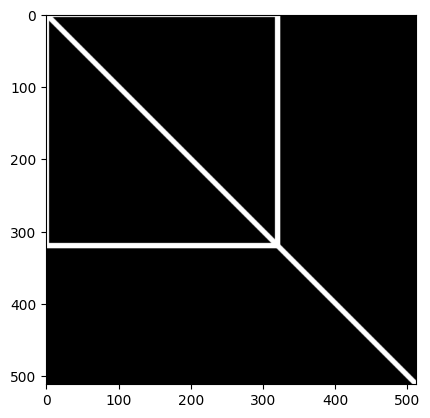

In [2]:
"""
draw rectangle
"""

cv.rectangle(img31, (0, 0), (320, 320), (255, 255, 255), 5, cv.LINE_AA)

plt.imshow(img31)

### 3.3画圆

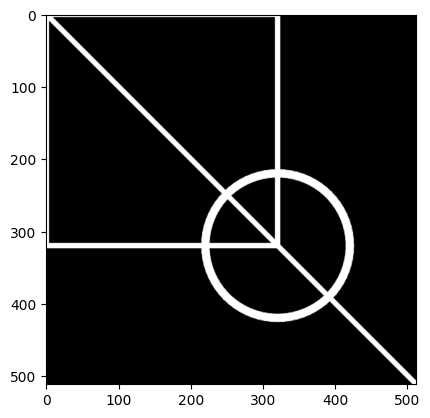

In [5]:
"""
draw circle
"""

cv.circle(img31, (320, 320), 100, (255, 255, 255), 5, cv.LINE_AA)

plt.imshow(img31)

### 3.4画椭圆
用法`cv2.ellipse(image, centerCoordinates, axesLength, angle, startAngle, endAngle, color , thickness, linetype, shift)`
- `image` :需要绘制的图像。
- `centerCoordinates`:椭圆的中心坐标。坐标表示两个值的元组，即（X坐标值，Y坐标值）
- `axesLength`:它包含两个变量的元组，分别包含分别包含椭圆的长轴和短轴(长轴长度，短轴长度)。
- `angle`:椭圆旋转角度，以度为单位。
- `startAngle`:椭圆弧的起始角度，以度为单位。
- `endAngle`:椭圆弧的终止角度，以度为单位。
- `color`:它是要绘制的形状边界线的颜色。对于BGR，我们通过一个元组。例如：(255，0，0)为蓝色。
- `thickness`:是形状边界线的粗细像素。厚度-1像素将用指定的颜色填充形状。
- `lineType`:这是一个可选参数，它给出了椭圆边界的类型。
- `shift`:这是一个可选参数。它表示中心坐标中的小数位数和轴的值。

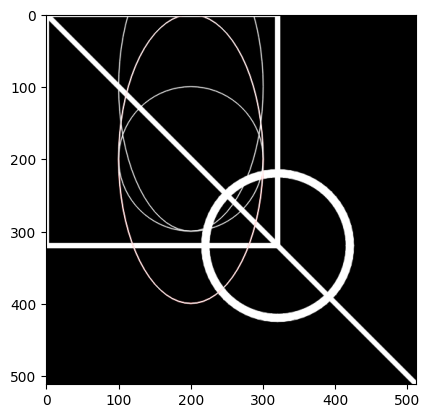

In [11]:
"""
draw ellipse
"""

cv.ellipse(img31, (200, 100), (100, 200), 0, 0, 360, (255, 255, 255), 1, cv.LINE_AA)
plt.imshow(img31)


## 4.鼠标作为画笔

In [13]:

import numpy as np
import cv2 as cv
# 鼠标回调函数
def draw_circle(event,x,y,flags,param):
    if event == cv.EVENT_LBUTTONDBLCLK:
        cv.circle(img,(x,y),100,(255,0,0),-1)
# 创建一个黑色的图像，一个窗口，并绑定到窗口的功能
img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)
while(1):
    cv.imshow('image',img)
    if cv.waitKey(20) & 0xFF == 27:
        break
cv.destroyAllWindows()

KeyboardInterrupt: 

: 